In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df['v1'].count()

5572

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'No. of ham vs spam emails')

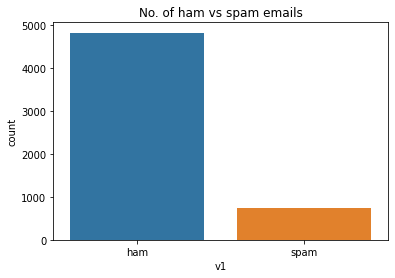

In [8]:

sns.countplot('v1',data=df)
plt.title("No. of ham vs spam emails")

In [9]:
df=df.drop('Unnamed: 2',axis=1)

In [10]:
df=df.drop(['Unnamed: 3','Unnamed: 4'],axis=1)

In [11]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df[df.index==2]['v2'].iloc[0]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
sen="My name is jatin goyal and i love machine learning"

In [15]:
word_tokenize(sen)

['My',
 'name',
 'is',
 'jatin',
 'goyal',
 'and',
 'i',
 'love',
 'machine',
 'learning']

In [16]:
from nltk.corpus import stopwords

In [17]:
stopword=set(stopwords.words('english'))

In [18]:
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
txt=sen.split()

In [20]:
txt

['My',
 'name',
 'is',
 'jatin',
 'goyal',
 'and',
 'i',
 'love',
 'machine',
 'learning']

In [21]:
final=""
for words in txt:
    if words not in stopword:
        final=final+" "+words

In [22]:
final

' My name jatin goyal love machine learning'

In [23]:
many_sentence=[
    'My name is jatin goyal',
    'I love to code in python',
    'I love watching web series'
]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv=CountVectorizer()

In [26]:
freq=cv.fit_transform(many_sentence)

In [27]:
print(freq)

  (0, 6)	1
  (0, 7)	1
  (0, 3)	1
  (0, 4)	1
  (0, 1)	1
  (1, 5)	1
  (1, 10)	1
  (1, 0)	1
  (1, 2)	1
  (1, 8)	1
  (2, 5)	1
  (2, 11)	1
  (2, 12)	1
  (2, 9)	1


In [28]:
freq.toarray()

array([[0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]])

In [29]:
print(cv.vocabulary_)

{'my': 6, 'name': 7, 'is': 3, 'jatin': 4, 'goyal': 1, 'love': 5, 'to': 10, 'code': 0, 'in': 2, 'python': 8, 'watching': 11, 'web': 12, 'series': 9}


In [30]:
def remove_stoprwords(text, stopwords):
    final = [w for w in text if w not in stopwords]
    return final

In [31]:
def token(document):
    words = word_tokenize(document.lower())
    words = remove_stoprwords(words, stopword)
    return words

In [32]:
cv = CountVectorizer(tokenizer=token)

In [33]:
vector = cv.fit_transform(many_sentence).toarray()

In [34]:
vector

array([[0, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 1]])

In [35]:
cv.vocabulary_

{'name': 4,
 'jatin': 2,
 'goyal': 1,
 'love': 3,
 'code': 0,
 'python': 5,
 'watching': 7,
 'web': 8,
 'series': 6}

making models

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [37]:
tfidf_vector=TfidfVectorizer().fit_transform(many_sentence)

In [38]:
tfidf_vector.toarray()

array([[0.        , 0.4472136 , 0.        , 0.4472136 , 0.4472136 ,
        0.        , 0.4472136 , 0.4472136 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.46735098, 0.        , 0.46735098, 0.        , 0.        ,
        0.35543247, 0.        , 0.        , 0.46735098, 0.        ,
        0.46735098, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40204024, 0.        , 0.        , 0.        , 0.52863461,
        0.        , 0.52863461, 0.52863461]])

In [39]:
from nltk.corpus import stopwords

In [40]:
import string

In [41]:
def remove_stopwords(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [42]:
transformer=CountVectorizer(analyzer=remove_stopwords)

In [43]:
matrix=transformer.fit_transform(df['v2'])

In [44]:
matrix.shape

(5572, 11301)

In [45]:
matrix.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
len(transformer.vocabulary_)

11301

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer


In [48]:
tfidf_transformer = TfidfTransformer().fit_transform(matrix)


In [49]:
tfidf_transformer.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
test=df['v2'][0]
test

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [51]:
test_matrix=transformer.transform([test])

In [52]:
test_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [53]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(tfidf_transformer, df['v1'])

In [54]:
print('predicted:', model.predict(tfidf_transformer[9])[0])
print('expected:', df['v1'][0])

predicted: spam
expected: ham


In [55]:
all_predictions = model.predict(tfidf_transformer)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [56]:
from sklearn.metrics import classification_report
print (classification_report(df['v1'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [57]:
model.score(tfidf_transformer, df['v1'])


0.9795405599425699

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2)

In [59]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('count', CountVectorizer(analyzer=remove_stopwords)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])


In [60]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('count',
                 CountVectorizer(analyzer=<function remove_stopwords at 0x7fdf71db79e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [61]:
predictions = pipeline.predict(x_test)

In [62]:
pipeline.score(x_test,y_test)

0.9650224215246637

In [63]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1011
        spam       0.73      1.00      0.84       104

    accuracy                           0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.97      0.97      1115



In [64]:
x_train.iloc(0)[3]

"It's fine, imma get a drink or somethin. Want me to come find you?"

In [65]:
import joblib
joblib.dump(pipeline, 'spam.pkl')


['spam.pkl']

In [66]:
load_model = joblib.load('spam.pkl')

In [67]:
load_model.predict(['SplashMobile: Choose from 1000s of gr8 tones each wk! This is a subscrition service with weekly tones costing 300p. U have one credit - kick back and ENJOY'])

array(['spam'], dtype='<U4')

In [68]:
from sklearn.pipeline import Pipeline

pipeline2 = Pipeline([
    ('count', TfidfVectorizer(analyzer=remove_stopwords)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])


In [69]:
pipeline2.fit(x_train,y_train)

Pipeline(steps=[('count',
                 TfidfVectorizer(analyzer=<function remove_stopwords at 0x7fdf71db79e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [70]:
predictions2 = pipeline2.predict(x_test)

In [71]:
pipeline2.score(x_test,y_test)

0.9650224215246637

In [72]:
print(classification_report(predictions2,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1011
        spam       0.73      1.00      0.84       104

    accuracy                           0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.97      0.97      1115



In [73]:
pipeline2.predict(['FREE RINGTONE text FIRST to 87131 for a poly or text GET to 87131 for a true tone! Help? 0845 2814032 16 after 1st free, tones are 3x�150pw to e�nd txt stop'])

array(['spam'], dtype='<U4')

In [74]:
x_test.iloc(0)[4]

'happened here while you were adventuring'

In [75]:
joblib.dump(pipeline2, 'spam2.pkl')


['spam2.pkl']

In [76]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")


In [77]:
from nltk.stem import SnowballStemmer
def remove_stopwords2(text):
    text=[stemmer.stem(words) for words in text]
    text="".join(text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [78]:
words=remove_stopwords2(df['v2'])

In [79]:
# words

In [80]:

pipeline3 = Pipeline([
    ('count', TfidfVectorizer(analyzer=remove_stopwords2)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])


In [81]:
pipeline3.fit(x_train,y_train)

Pipeline(steps=[('count',
                 TfidfVectorizer(analyzer=<function remove_stopwords2 at 0x7fdf35970c20>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [82]:
predictions3 = pipeline3.predict(x_test)

In [83]:
pipeline3.score(x_test,y_test)

0.9632286995515695

In [84]:
print(classification_report(predictions3,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1013
        spam       0.71      1.00      0.83       102

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115

